# Stock-Forecasting

Stock market can be seen as a sequence of values (each day could be a time step), and thus you can predict the closing value of the next day, knowing the past.

## Data exploration

First, we load the dataset `all_stocks_5yr.csv`, which contains all the stock market values over 5 years for many companies.

In [17]:
# TODO: Load the dataset and explore it
import pandas as pd
import seaborn as sns
import sklearn as sk
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

# To ignore annoying warning
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [18]:
#Loading dataset and exploring
stocks_df = pd.read_csv('all_stocks_5yr.csv')
stocks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    619040 non-null  object 
 1   open    619029 non-null  float64
 2   high    619032 non-null  float64
 3   low     619032 non-null  float64
 4   close   619040 non-null  float64
 5   volume  619040 non-null  int64  
 6   Name    619040 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 33.1+ MB


In [19]:
stocks_df['date']=pd.to_datetime(stocks_df['date'])
stocks_df.head(5)

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


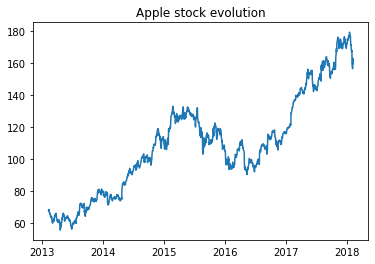

In [20]:
# Plot the stock market evolution of a Apple
Apple_df = stocks_df[stocks_df['Name'] =='AAPL']

plt.plot(Apple_df['date'],Apple_df['close'])
plt.title("Apple stock evolution")
plt.show()

In [21]:
### Select companies with enough data to create a sequential model

companies_to_analyse = []
companies_df = {}

for name in stocks_df['Name'].unique():
    company_df = stocks_df[stocks_df['Name'] == name]
    if len(company_df) > 1000 :
        companies_to_analyse.append(name)
        companies_df[name] = company_df

> NB: for those who want a more accurate representation of the stock market, a really common visualization is the candlesticks. One can plot them using the matplotlib finance library https://github.com/matplotlib/mplfinance

## Data preparation

We prepare data with a lookback of 30 days in order to predict close value based on `[open, high, low, close, volume]` of the past 30 days. We also rescale the data.

In [22]:
from sklearn.preprocessing import StandardScaler

def processData(data, past):
    X,Y = [],[]
    for i in range(len(data)-past):
        X.append(data[i:i+past, 0:5])
        Y.append(data[i+past, 3])

    return np.array(X),np.array(Y)

columns_to_shift = ['open', 'high', 'low', 'close', 'volume']
lookback = 30 #here in days

companies_scaled_data = {}
companies_processed_data = {}
companies_scaler = {}
companies_dates = {}

for name in companies_to_analyse :
    companies_processed_data[name] = {}
    
    data_company = companies_df[name][columns_to_shift]
    
    companies_dates[name] = companies_df[name]['date'].to_numpy()
    
    scaler = StandardScaler()
    data_scaled_company = scaler.fit_transform(data_company)
    companies_scaled_data[name] = data_scaled_company
    companies_scaler[name] = scaler
    
    X, y = processData(data_scaled_company, lookback)
    
    companies_processed_data[name]['X'] = X
    companies_processed_data[name]['y'] = y

# Train-Test splitting

In [23]:
from sklearn.model_selection import train_test_split

companies_train_test_data = {}

for name in companies_to_analyse :
    companies_train_test_data[name] = {}
    X_train, X_test, y_train, y_test = train_test_split(companies_processed_data[name]['X'], companies_processed_data[name]['y'], 
                                                        test_size=0.3, random_state=0, shuffle=False)
    companies_train_test_data[name]['X_train'] = X_train
    companies_train_test_data[name]['X_test'] = X_test
    companies_train_test_data[name]['y_train'] = y_train
    companies_train_test_data[name]['y_test'] = y_test

# Select a company ticker

Select an interesting company to develop an LSTM model.

In [152]:
companies_to_analyse

['AAL',
 'AAPL',
 'AAP',
 'ABBV',
 'ABC',
 'ABT',
 'ACN',
 'ADBE',
 'ADI',
 'ADM',
 'ADP',
 'ADSK',
 'ADS',
 'AEE',
 'AEP',
 'AES',
 'AET',
 'AFL',
 'AGN',
 'AIG',
 'AIV',
 'AIZ',
 'AJG',
 'AKAM',
 'ALB',
 'ALGN',
 'ALK',
 'ALLE',
 'ALL',
 'ALXN',
 'AMAT',
 'AMD',
 'AME',
 'AMGN',
 'AMG',
 'AMP',
 'AMT',
 'AMZN',
 'ANDV',
 'ANSS',
 'ANTM',
 'AON',
 'AOS',
 'APA',
 'APC',
 'APD',
 'APH',
 'ARE',
 'ARNC',
 'ATVI',
 'AVB',
 'AVGO',
 'AVY',
 'AWK',
 'AXP',
 'AYI',
 'AZO',
 'A',
 'BAC',
 'BAX',
 'BA',
 'BBT',
 'BBY',
 'BDX',
 'BEN',
 'BF.B',
 'BIIB',
 'BK',
 'BLK',
 'BLL',
 'BMY',
 'BRK.B',
 'BSX',
 'BWA',
 'BXP',
 'CAG',
 'CAH',
 'CAT',
 'CA',
 'CBG',
 'CBOE',
 'CBS',
 'CB',
 'CCI',
 'CCL',
 'CDNS',
 'CELG',
 'CERN',
 'CF',
 'CHD',
 'CHK',
 'CHRW',
 'CHTR',
 'CINF',
 'CI',
 'CLX',
 'CL',
 'CMA',
 'CMCSA',
 'CME',
 'CMG',
 'CMI',
 'CMS',
 'CNC',
 'CNP',
 'COF',
 'COG',
 'COL',
 'COO',
 'COP',
 'COST',
 'COTY',
 'CPB',
 'CRM',
 'CSCO',
 'CSX',
 'CTAS',
 'CTL',
 'CTSH',
 'CTXS',
 'CVS',
 'CVX

In [24]:
selected_name = "NFLX"

## Model training

Now that the data is ready, we use keras-tuner to find the most appropriate LSTM model to predict stock valu for this company.

In [32]:
#Random search preparation

from kerastuner.tuners import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Embedding, Dropout, LSTM
import time

log_dir = f"{int(time.time())}"

def build_model(hp):

    model = Sequential()
    units_chosen = hp.Int("units",min_value = 16, max_value = 160, step = 16)
    
    model.add(LSTM(units=units_chosen, return_sequences=True, input_shape=(lookback,5)))
    
    for i in range(hp.Int("n_layers", 0, 3)):
        model.add(LSTM(units=units_chosen, return_sequences=True))
        
    model.add(LSTM(units=units_chosen, return_sequences=False))
    model.add(Dense(units=1, activation='linear'))

    #Compile
    model.compile(optimizer='adam',
              loss='mean_squared_error')
    
    return model

In [33]:
#Launching random search

tuner = RandomSearch(
        build_model,
        objective = "val_loss",
        max_trials = 10,
        executions_per_trial = 2,
        directory = log_dir
        )

tuner.search(x = companies_train_test_data[selected_name]['X_train'],
             y = companies_train_test_data[selected_name]['y_train'],
             epochs = 30,
             batch_size = 32,
             validation_data = (companies_train_test_data[selected_name]['X_test'],
                                companies_train_test_data[selected_name]['y_test']))

Epoch 1/30
27/27 [==============================] - ETA: 0s - loss: 0.557 - ETA: 0s - loss: 0.345 - ETA: 0s - loss: 0.221 - ETA: 0s - loss: 0.180 - ETA: 0s - loss: 0.152 - ETA: 0s - loss: 0.129 - ETA: 0s - loss: 0.117 - ETA: 0s - loss: 0.105 - ETA: 0s - loss: 0.095 - ETA: 0s - loss: 0.087 - ETA: 0s - loss: 0.081 - ETA: 0s - loss: 0.076 - ETA: 0s - loss: 0.072 - ETA: 0s - loss: 0.069 - 2s 57ms/step - loss: 0.0690 - val_loss: 0.7009
Epoch 2/30
27/27 [==============================] - ETA: 0s - loss: 0.024 - ETA: 0s - loss: 0.021 - ETA: 0s - loss: 0.017 - ETA: 0s - loss: 0.016 - ETA: 0s - loss: 0.017 - ETA: 0s - loss: 0.017 - ETA: 0s - loss: 0.016 - ETA: 0s - loss: 0.016 - ETA: 0s - loss: 0.015 - ETA: 0s - loss: 0.015 - ETA: 0s - loss: 0.015 - ETA: 0s - loss: 0.014 - ETA: 0s - loss: 0.014 - ETA: 0s - loss: 0.014 - 1s 30ms/step - loss: 0.0142 - val_loss: 0.8250
Epoch 3/30
27/27 [==============================] - ETA: 0s - loss: 0.017 - ETA: 0s - loss: 0.014 - ETA: 0s - loss: 0.011 - ETA: 0

Epoch 18/30
27/27 [==============================] - ETA: 0s - loss: 0.008 - ETA: 0s - loss: 0.008 - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.007 - ETA: 0s - loss: 0.007 - ETA: 0s - loss: 0.007 - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.006 - 1s 29ms/step - loss: 0.0063 - val_loss: 0.5839
Epoch 19/30
27/27 [==============================] - ETA: 0s - loss: 0.004 - ETA: 0s - loss: 0.003 - ETA: 0s - loss: 0.005 - ETA: 0s - loss: 0.004 - ETA: 0s - loss: 0.005 - ETA: 0s - loss: 0.005 - ETA: 0s - loss: 0.005 - ETA: 0s - loss: 0.005 - ETA: 0s - loss: 0.005 - ETA: 0s - loss: 0.005 - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.005 - ETA: 0s - loss: 0.005 - ETA: 0s - loss: 0.005 - 1s 29ms/step - loss: 0.0056 - val_loss: 0.6762
Epoch 20/30
27/27 [==============================] - ETA: 0s - loss: 0.003 - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.006 - ETA

27/27 [==============================] - ETA: 0s - loss: 0.012 - ETA: 0s - loss: 0.009 - ETA: 0s - loss: 0.007 - ETA: 0s - loss: 0.007 - ETA: 0s - loss: 0.007 - ETA: 0s - loss: 0.007 - ETA: 0s - loss: 0.008 - ETA: 0s - loss: 0.008 - ETA: 0s - loss: 0.007 - ETA: 0s - loss: 0.007 - ETA: 0s - loss: 0.007 - ETA: 0s - loss: 0.007 - ETA: 0s - loss: 0.008 - ETA: 0s - loss: 0.008 - 1s 30ms/step - loss: 0.0081 - val_loss: 0.4443
Epoch 7/30
27/27 [==============================] - ETA: 0s - loss: 0.004 - ETA: 0s - loss: 0.004 - ETA: 0s - loss: 0.005 - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.007 - ETA: 0s - loss: 0.007 - ETA: 0s - loss: 0.007 - ETA: 0s - loss: 0.008 - ETA: 0s - loss: 0.007 - ETA: 0s - loss: 0.007 - ETA: 0s - loss: 0.007 - ETA: 0s - loss: 0.007 - ETA: 0s - loss: 0.007 - 1s 30ms/step - loss: 0.0079 - val_loss: 0.5934
Epoch 8/30
27/27 [==============================] - ETA: 0s - loss: 0.008 - ETA: 0s - loss: 0.008 - ETA: 0s - loss: 0.008 - ETA: 0s - loss: 0

27/27 [==============================] - ETA: 0s - loss: 0.003 - ETA: 0s - loss: 0.005 - ETA: 0s - loss: 0.005 - ETA: 0s - loss: 0.004 - ETA: 0s - loss: 0.004 - ETA: 0s - loss: 0.004 - ETA: 0s - loss: 0.004 - ETA: 0s - loss: 0.005 - ETA: 0s - loss: 0.005 - ETA: 0s - loss: 0.005 - ETA: 0s - loss: 0.005 - ETA: 0s - loss: 0.005 - ETA: 0s - loss: 0.005 - ETA: 0s - loss: 0.005 - 1s 30ms/step - loss: 0.0050 - val_loss: 0.5309
Epoch 25/30
27/27 [==============================] - ETA: 0s - loss: 0.012 - ETA: 0s - loss: 0.005 - ETA: 0s - loss: 0.005 - ETA: 0s - loss: 0.004 - ETA: 0s - loss: 0.004 - ETA: 0s - loss: 0.004 - ETA: 0s - loss: 0.004 - ETA: 0s - loss: 0.004 - ETA: 0s - loss: 0.004 - ETA: 0s - loss: 0.004 - ETA: 0s - loss: 0.004 - ETA: 0s - loss: 0.004 - ETA: 0s - loss: 0.004 - ETA: 0s - loss: 0.004 - 1s 30ms/step - loss: 0.0048 - val_loss: 0.3914
Epoch 26/30
27/27 [==============================] - ETA: 0s - loss: 0.005 - ETA: 0s - loss: 0.003 - ETA: 0s - loss: 0.004 - ETA: 0s - loss:

Epoch 1/30
27/27 [==============================] - ETA: 0s - loss: 0.527 - ETA: 1s - loss: 0.374 - ETA: 1s - loss: 0.262 - ETA: 1s - loss: 0.235 - ETA: 1s - loss: 0.200 - ETA: 1s - loss: 0.184 - ETA: 1s - loss: 0.171 - ETA: 1s - loss: 0.154 - ETA: 1s - loss: 0.140 - ETA: 1s - loss: 0.134 - ETA: 1s - loss: 0.126 - ETA: 1s - loss: 0.120 - ETA: 1s - loss: 0.114 - ETA: 0s - loss: 0.109 - ETA: 0s - loss: 0.106 - ETA: 0s - loss: 0.101 - ETA: 0s - loss: 0.097 - ETA: 0s - loss: 0.093 - ETA: 0s - loss: 0.090 - ETA: 0s - loss: 0.087 - ETA: 0s - loss: 0.084 - ETA: 0s - loss: 0.081 - ETA: 0s - loss: 0.078 - ETA: 0s - loss: 0.076 - ETA: 0s - loss: 0.074 - ETA: 0s - loss: 0.071 - ETA: 0s - loss: 0.070 - 3s 129ms/step - loss: 0.0707 - val_loss: 0.8869
Epoch 2/30
27/27 [==============================] - ETA: 0s - loss: 0.025 - ETA: 0s - loss: 0.022 - ETA: 1s - loss: 0.020 - ETA: 1s - loss: 0.021 - ETA: 1s - loss: 0.019 - ETA: 1s - loss: 0.019 - ETA: 1s - loss: 0.020 - ETA: 1s - loss: 0.019 - ETA: 1s 

Epoch 12/30
27/27 [==============================] - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.006 - ETA: 1s - loss: 0.007 - ETA: 1s - loss: 0.007 - ETA: 1s - loss: 0.008 - ETA: 1s - loss: 0.008 - ETA: 1s - loss: 0.008 - ETA: 1s - loss: 0.008 - ETA: 1s - loss: 0.007 - ETA: 1s - loss: 0.007 - ETA: 1s - loss: 0.007 - ETA: 0s - loss: 0.008 - ETA: 0s - loss: 0.008 - ETA: 0s - loss: 0.008 - ETA: 0s - loss: 0.008 - ETA: 0s - loss: 0.009 - ETA: 0s - loss: 0.009 - ETA: 0s - loss: 0.009 - ETA: 0s - loss: 0.009 - ETA: 0s - loss: 0.009 - ETA: 0s - loss: 0.009 - ETA: 0s - loss: 0.009 - ETA: 0s - loss: 0.008 - ETA: 0s - loss: 0.008 - ETA: 0s - loss: 0.008 - ETA: 0s - loss: 0.008 - ETA: 0s - loss: 0.008 - 2s 76ms/step - loss: 0.0087 - val_loss: 0.7627
Epoch 13/30
27/27 [==============================] - ETA: 0s - loss: 0.007 - ETA: 0s - loss: 0.008 - ETA: 1s - loss: 0.007 - ETA: 1s - loss: 0.007 - ETA: 1s - loss: 0.007 - ETA: 1s - loss: 0.007 - ETA: 1s - loss: 0.008 - ETA: 1s - loss: 0.008 - ETA: 1s

Epoch 23/30
27/27 [==============================] - ETA: 0s - loss: 0.005 - ETA: 0s - loss: 0.008 - ETA: 1s - loss: 0.008 - ETA: 1s - loss: 0.008 - ETA: 1s - loss: 0.008 - ETA: 1s - loss: 0.008 - ETA: 1s - loss: 0.007 - ETA: 1s - loss: 0.007 - ETA: 1s - loss: 0.007 - ETA: 1s - loss: 0.007 - ETA: 1s - loss: 0.006 - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.005 - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.006 - 2s 78ms/step - loss: 0.0060 - val_loss: 1.3259
Epoch 24/30
27/27 [==============================] - ETA: 0s - loss: 0.003 - ETA: 0s - loss: 0.005 - ETA: 1s - loss: 0.004 - ETA: 1s - loss: 0.004 - ETA: 1s - loss: 0.004 - ETA: 1s - loss: 0.004 - ETA: 1s - loss: 0.005 - ETA: 1s - loss: 0.005 - ETA: 1s

Epoch 4/30
27/27 [==============================] - ETA: 0s - loss: 0.017 - ETA: 0s - loss: 0.017 - ETA: 1s - loss: 0.018 - ETA: 1s - loss: 0.016 - ETA: 1s - loss: 0.015 - ETA: 1s - loss: 0.014 - ETA: 1s - loss: 0.013 - ETA: 1s - loss: 0.013 - ETA: 1s - loss: 0.013 - ETA: 1s - loss: 0.012 - ETA: 1s - loss: 0.013 - ETA: 0s - loss: 0.013 - ETA: 0s - loss: 0.013 - ETA: 0s - loss: 0.013 - ETA: 0s - loss: 0.014 - ETA: 0s - loss: 0.014 - ETA: 0s - loss: 0.014 - ETA: 0s - loss: 0.014 - ETA: 0s - loss: 0.014 - ETA: 0s - loss: 0.014 - ETA: 0s - loss: 0.014 - ETA: 0s - loss: 0.013 - ETA: 0s - loss: 0.013 - ETA: 0s - loss: 0.013 - ETA: 0s - loss: 0.013 - ETA: 0s - loss: 0.013 - ETA: 0s - loss: 0.013 - 2s 79ms/step - loss: 0.0136 - val_loss: 1.0613
Epoch 5/30
27/27 [==============================] - ETA: 0s - loss: 0.010 - ETA: 0s - loss: 0.013 - ETA: 1s - loss: 0.012 - ETA: 1s - loss: 0.012 - ETA: 1s - loss: 0.012 - ETA: 1s - loss: 0.013 - ETA: 1s - loss: 0.013 - ETA: 1s - loss: 0.014 - ETA: 1s -

Epoch 15/30
27/27 [==============================] - ETA: 0s - loss: 0.003 - ETA: 0s - loss: 0.004 - ETA: 1s - loss: 0.004 - ETA: 1s - loss: 0.005 - ETA: 1s - loss: 0.006 - ETA: 1s - loss: 0.005 - ETA: 1s - loss: 0.006 - ETA: 1s - loss: 0.006 - ETA: 1s - loss: 0.006 - ETA: 1s - loss: 0.007 - ETA: 0s - loss: 0.007 - ETA: 0s - loss: 0.007 - ETA: 0s - loss: 0.007 - ETA: 0s - loss: 0.007 - ETA: 0s - loss: 0.007 - ETA: 0s - loss: 0.007 - ETA: 0s - loss: 0.007 - ETA: 0s - loss: 0.007 - ETA: 0s - loss: 0.007 - ETA: 0s - loss: 0.007 - ETA: 0s - loss: 0.007 - ETA: 0s - loss: 0.007 - ETA: 0s - loss: 0.008 - ETA: 0s - loss: 0.008 - ETA: 0s - loss: 0.008 - ETA: 0s - loss: 0.008 - ETA: 0s - loss: 0.008 - 2s 74ms/step - loss: 0.0081 - val_loss: 0.7820
Epoch 16/30
27/27 [==============================] - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.005 - ETA: 1s - loss: 0.006 - ETA: 1s - loss: 0.006 - ETA: 1s - loss: 0.006 - ETA: 1s - loss: 0.006 - ETA: 1s - loss: 0.007 - ETA: 1s - loss: 0.007 - ETA: 1s

Epoch 26/30
27/27 [==============================] - ETA: 0s - loss: 0.011 - ETA: 0s - loss: 0.007 - ETA: 1s - loss: 0.006 - ETA: 1s - loss: 0.006 - ETA: 1s - loss: 0.006 - ETA: 1s - loss: 0.006 - ETA: 1s - loss: 0.007 - ETA: 1s - loss: 0.007 - ETA: 1s - loss: 0.007 - ETA: 1s - loss: 0.006 - ETA: 1s - loss: 0.006 - ETA: 1s - loss: 0.006 - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.007 - ETA: 0s - loss: 0.007 - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.006 - 2s 82ms/step - loss: 0.0065 - val_loss: 1.2591
Epoch 27/30
27/27 [==============================] - ETA: 0s - loss: 0.004 - ETA: 0s - loss: 0.006 - ETA: 1s - loss: 0.006 - ETA: 1s - loss: 0.006 - ETA: 1s - loss: 0.006 - ETA: 1s - loss: 0.006 - ETA: 1s - loss: 0.005 - ETA: 1s - loss: 0.005 - ETA: 1s

Epoch 1/30
27/27 [==============================] - ETA: 0s - loss: 0.415 - ETA: 0s - loss: 0.300 - ETA: 0s - loss: 0.209 - ETA: 0s - loss: 0.181 - ETA: 0s - loss: 0.138 - ETA: 0s - loss: 0.124 - ETA: 0s - loss: 0.119 - ETA: 0s - loss: 0.107 - ETA: 0s - loss: 0.097 - ETA: 0s - loss: 0.091 - ETA: 0s - loss: 0.086 - ETA: 0s - loss: 0.080 - ETA: 0s - loss: 0.077 - ETA: 0s - loss: 0.074 - ETA: 0s - loss: 0.070 - 2s 86ms/step - loss: 0.0706 - val_loss: 0.5861
Epoch 2/30
27/27 [==============================] - ETA: 0s - loss: 0.012 - ETA: 0s - loss: 0.021 - ETA: 0s - loss: 0.023 - ETA: 0s - loss: 0.023 - ETA: 0s - loss: 0.020 - ETA: 0s - loss: 0.021 - ETA: 0s - loss: 0.021 - ETA: 0s - loss: 0.021 - ETA: 0s - loss: 0.021 - ETA: 0s - loss: 0.021 - ETA: 0s - loss: 0.021 - ETA: 0s - loss: 0.021 - ETA: 0s - loss: 0.020 - ETA: 0s - loss: 0.020 - 1s 45ms/step - loss: 0.0204 - val_loss: 0.9528
Epoch 3/30
27/27 [==============================] - ETA: 0s - loss: 0.014 - ETA: 0s - loss: 0.011 - ETA: 0

27/27 [==============================] - ETA: 0s - loss: 0.003 - ETA: 0s - loss: 0.007 - ETA: 0s - loss: 0.007 - ETA: 0s - loss: 0.007 - ETA: 0s - loss: 0.007 - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.006 - 1s 45ms/step - loss: 0.0067 - val_loss: 0.9023
Epoch 20/30
27/27 [==============================] - ETA: 0s - loss: 0.005 - ETA: 0s - loss: 0.005 - ETA: 0s - loss: 0.007 - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.006 - 1s 44ms/step - loss: 0.0061 - val_loss: 0.7854
Epoch 21/30
27/27 [==============================] - ETA: 0s - loss: 0.004 - ETA: 0s - loss: 0.005 - ETA: 0s - loss: 0.005 - ETA: 0s - loss:

27/27 [==============================] - ETA: 0s - loss: 0.013 - ETA: 0s - loss: 0.011 - ETA: 0s - loss: 0.011 - ETA: 0s - loss: 0.010 - ETA: 0s - loss: 0.011 - ETA: 0s - loss: 0.010 - ETA: 0s - loss: 0.010 - ETA: 0s - loss: 0.010 - ETA: 0s - loss: 0.010 - ETA: 0s - loss: 0.010 - ETA: 0s - loss: 0.010 - ETA: 0s - loss: 0.010 - ETA: 0s - loss: 0.010 - ETA: 0s - loss: 0.010 - 1s 45ms/step - loss: 0.0103 - val_loss: 0.8238
Epoch 8/30
27/27 [==============================] - ETA: 0s - loss: 0.013 - ETA: 0s - loss: 0.009 - ETA: 0s - loss: 0.008 - ETA: 0s - loss: 0.008 - ETA: 0s - loss: 0.008 - ETA: 0s - loss: 0.007 - ETA: 0s - loss: 0.007 - ETA: 0s - loss: 0.008 - ETA: 0s - loss: 0.008 - ETA: 0s - loss: 0.008 - ETA: 0s - loss: 0.009 - ETA: 0s - loss: 0.009 - ETA: 0s - loss: 0.009 - ETA: 0s - loss: 0.009 - 1s 44ms/step - loss: 0.0095 - val_loss: 0.7819
Epoch 9/30
27/27 [==============================] - ETA: 0s - loss: 0.005 - ETA: 0s - loss: 0.009 - ETA: 0s - loss: 0.009 - ETA: 0s - loss: 0

27/27 [==============================] - ETA: 0s - loss: 0.003 - ETA: 0s - loss: 0.003 - ETA: 0s - loss: 0.003 - ETA: 0s - loss: 0.004 - ETA: 0s - loss: 0.004 - ETA: 0s - loss: 0.004 - ETA: 0s - loss: 0.005 - ETA: 0s - loss: 0.005 - ETA: 0s - loss: 0.005 - ETA: 0s - loss: 0.005 - ETA: 0s - loss: 0.005 - ETA: 0s - loss: 0.005 - ETA: 0s - loss: 0.005 - ETA: 0s - loss: 0.005 - 1s 46ms/step - loss: 0.0056 - val_loss: 0.8061
Epoch 26/30
27/27 [==============================] - ETA: 0s - loss: 0.005 - ETA: 0s - loss: 0.005 - ETA: 0s - loss: 0.005 - ETA: 0s - loss: 0.005 - ETA: 0s - loss: 0.005 - ETA: 0s - loss: 0.005 - ETA: 0s - loss: 0.005 - ETA: 0s - loss: 0.004 - ETA: 0s - loss: 0.005 - ETA: 0s - loss: 0.005 - ETA: 0s - loss: 0.005 - ETA: 0s - loss: 0.005 - ETA: 0s - loss: 0.005 - ETA: 0s - loss: 0.005 - 1s 46ms/step - loss: 0.0056 - val_loss: 0.9689
Epoch 27/30
27/27 [==============================] - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.008 - ETA: 0s - loss: 0.007 - ETA: 0s - loss:

Epoch 1/30
27/27 [==============================] - ETA: 0s - loss: 0.447 - ETA: 0s - loss: 0.318 - ETA: 0s - loss: 0.217 - ETA: 1s - loss: 0.263 - ETA: 1s - loss: 0.230 - ETA: 1s - loss: 0.200 - ETA: 0s - loss: 0.197 - ETA: 0s - loss: 0.193 - ETA: 0s - loss: 0.185 - ETA: 0s - loss: 0.177 - ETA: 0s - loss: 0.167 - ETA: 0s - loss: 0.155 - ETA: 0s - loss: 0.146 - ETA: 0s - loss: 0.139 - ETA: 0s - loss: 0.134 - ETA: 0s - loss: 0.129 - ETA: 0s - loss: 0.124 - ETA: 0s - loss: 0.119 - ETA: 0s - loss: 0.114 - ETA: 0s - loss: 0.110 - ETA: 0s - loss: 0.107 - ETA: 0s - loss: 0.104 - ETA: 0s - loss: 0.100 - ETA: 0s - loss: 0.097 - ETA: 0s - loss: 0.094 - ETA: 0s - loss: 0.091 - ETA: 0s - loss: 0.089 - 3s 100ms/step - loss: 0.0890 - val_loss: 0.3412
Epoch 2/30
27/27 [==============================] - ETA: 0s - loss: 0.032 - ETA: 0s - loss: 0.034 - ETA: 0s - loss: 0.033 - ETA: 0s - loss: 0.030 - ETA: 0s - loss: 0.028 - ETA: 0s - loss: 0.026 - ETA: 0s - loss: 0.025 - ETA: 0s - loss: 0.024 - ETA: 0s 

Epoch 12/30
27/27 [==============================] - ETA: 0s - loss: 0.013 - ETA: 0s - loss: 0.009 - ETA: 0s - loss: 0.008 - ETA: 0s - loss: 0.008 - ETA: 0s - loss: 0.008 - ETA: 0s - loss: 0.008 - ETA: 0s - loss: 0.008 - ETA: 0s - loss: 0.008 - ETA: 0s - loss: 0.008 - ETA: 0s - loss: 0.008 - ETA: 0s - loss: 0.008 - ETA: 0s - loss: 0.008 - ETA: 0s - loss: 0.008 - ETA: 0s - loss: 0.008 - ETA: 0s - loss: 0.008 - ETA: 0s - loss: 0.007 - ETA: 0s - loss: 0.007 - ETA: 0s - loss: 0.008 - ETA: 0s - loss: 0.008 - ETA: 0s - loss: 0.007 - ETA: 0s - loss: 0.007 - ETA: 0s - loss: 0.008 - ETA: 0s - loss: 0.008 - ETA: 0s - loss: 0.008 - ETA: 0s - loss: 0.008 - ETA: 0s - loss: 0.008 - ETA: 0s - loss: 0.008 - 2s 61ms/step - loss: 0.0082 - val_loss: 0.9850
Epoch 13/30
27/27 [==============================] - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.007 - ETA: 0s - loss: 0.009 - ETA: 0s - loss: 0.008 - ETA: 0s - loss: 0.007 - ETA: 0s - loss: 0.007 - ETA: 0s - loss: 0.007 - ETA: 0s - loss: 0.008 - ETA: 0s

Epoch 23/30
27/27 [==============================] - ETA: 0s - loss: 0.004 - ETA: 0s - loss: 0.008 - ETA: 0s - loss: 0.007 - ETA: 1s - loss: 0.005 - ETA: 1s - loss: 0.005 - ETA: 1s - loss: 0.005 - ETA: 0s - loss: 0.005 - ETA: 0s - loss: 0.005 - ETA: 0s - loss: 0.005 - ETA: 0s - loss: 0.005 - ETA: 0s - loss: 0.005 - ETA: 0s - loss: 0.005 - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.005 - ETA: 0s - loss: 0.005 - ETA: 0s - loss: 0.005 - ETA: 0s - loss: 0.005 - ETA: 0s - loss: 0.005 - ETA: 0s - loss: 0.005 - ETA: 0s - loss: 0.005 - ETA: 0s - loss: 0.005 - ETA: 0s - loss: 0.005 - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.006 - 2s 65ms/step - loss: 0.0062 - val_loss: 0.7694
Epoch 24/30
27/27 [==============================] - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.008 - ETA: 0s - loss: 0.008 - ETA: 0s - loss: 0.008 - ETA: 1s - loss: 0.008 - ETA: 1s - loss: 0.009 - ETA: 1s - loss: 0.009 - ETA: 0s - loss: 0.009 - ETA: 0s

Epoch 4/30
27/27 [==============================] - ETA: 0s - loss: 0.009 - ETA: 0s - loss: 0.011 - ETA: 0s - loss: 0.011 - ETA: 0s - loss: 0.010 - ETA: 0s - loss: 0.012 - ETA: 0s - loss: 0.011 - ETA: 0s - loss: 0.010 - ETA: 0s - loss: 0.010 - ETA: 0s - loss: 0.010 - ETA: 0s - loss: 0.010 - ETA: 0s - loss: 0.010 - ETA: 0s - loss: 0.010 - ETA: 0s - loss: 0.010 - ETA: 0s - loss: 0.010 - ETA: 0s - loss: 0.010 - ETA: 0s - loss: 0.010 - ETA: 0s - loss: 0.010 - ETA: 0s - loss: 0.010 - ETA: 0s - loss: 0.011 - ETA: 0s - loss: 0.011 - ETA: 0s - loss: 0.011 - ETA: 0s - loss: 0.011 - ETA: 0s - loss: 0.011 - ETA: 0s - loss: 0.011 - ETA: 0s - loss: 0.011 - ETA: 0s - loss: 0.011 - ETA: 0s - loss: 0.011 - 2s 59ms/step - loss: 0.0115 - val_loss: 0.7975
Epoch 5/30
27/27 [==============================] - ETA: 0s - loss: 0.008 - ETA: 0s - loss: 0.007 - ETA: 0s - loss: 0.009 - ETA: 0s - loss: 0.010 - ETA: 0s - loss: 0.011 - ETA: 0s - loss: 0.011 - ETA: 0s - loss: 0.012 - ETA: 0s - loss: 0.011 - ETA: 0s -

Epoch 15/30
27/27 [==============================] - ETA: 0s - loss: 0.009 - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.006 - 2s 63ms/step - loss: 0.0068 - val_loss: 0.8102
Epoch 16/30
27/27 [==============================] - ETA: 0s - loss: 0.007 - ETA: 0s - loss: 0.008 - ETA: 0s - loss: 0.007 - ETA: 1s - loss: 0.007 - ETA: 1s - loss: 0.006 - ETA: 1s - loss: 0.006 - ETA: 1s - loss: 0.006 - ETA: 0s - loss: 0.007 - ETA: 0s

Epoch 26/30
27/27 [==============================] - ETA: 0s - loss: 0.004 - ETA: 0s - loss: 0.002 - ETA: 0s - loss: 0.002 - ETA: 1s - loss: 0.002 - ETA: 1s - loss: 0.002 - ETA: 1s - loss: 0.002 - ETA: 1s - loss: 0.003 - ETA: 0s - loss: 0.003 - ETA: 0s - loss: 0.003 - ETA: 0s - loss: 0.003 - ETA: 0s - loss: 0.003 - ETA: 0s - loss: 0.003 - ETA: 0s - loss: 0.003 - ETA: 0s - loss: 0.003 - ETA: 0s - loss: 0.003 - ETA: 0s - loss: 0.003 - ETA: 0s - loss: 0.004 - ETA: 0s - loss: 0.004 - ETA: 0s - loss: 0.004 - ETA: 0s - loss: 0.004 - ETA: 0s - loss: 0.004 - ETA: 0s - loss: 0.004 - ETA: 0s - loss: 0.004 - ETA: 0s - loss: 0.004 - ETA: 0s - loss: 0.004 - ETA: 0s - loss: 0.004 - ETA: 0s - loss: 0.004 - 2s 67ms/step - loss: 0.0043 - val_loss: 0.7550
Epoch 27/30
27/27 [==============================] - ETA: 0s - loss: 0.003 - ETA: 0s - loss: 0.007 - ETA: 0s - loss: 0.005 - ETA: 1s - loss: 0.004 - ETA: 1s - loss: 0.004 - ETA: 1s - loss: 0.004 - ETA: 1s - loss: 0.004 - ETA: 0s - loss: 0.004 - ETA: 0s

Epoch 1/30
27/27 [==============================] - ETA: 0s - loss: 0.667 - ETA: 0s - loss: 0.279 - ETA: 0s - loss: 0.192 - ETA: 0s - loss: 0.151 - ETA: 0s - loss: 0.126 - ETA: 0s - loss: 0.108 - ETA: 0s - loss: 0.098 - ETA: 0s - loss: 0.087 - ETA: 0s - loss: 0.081 - ETA: 0s - loss: 0.075 - ETA: 0s - loss: 0.069 - ETA: 0s - loss: 0.065 - ETA: 0s - loss: 0.061 - ETA: 0s - loss: 0.058 - 2s 72ms/step - loss: 0.0584 - val_loss: 0.4579
Epoch 2/30
27/27 [==============================] - ETA: 0s - loss: 0.016 - ETA: 0s - loss: 0.015 - ETA: 0s - loss: 0.014 - ETA: 0s - loss: 0.015 - ETA: 0s - loss: 0.014 - ETA: 0s - loss: 0.014 - ETA: 0s - loss: 0.013 - ETA: 0s - loss: 0.013 - ETA: 0s - loss: 0.013 - ETA: 0s - loss: 0.013 - ETA: 0s - loss: 0.012 - ETA: 0s - loss: 0.012 - ETA: 0s - loss: 0.012 - ETA: 0s - loss: 0.012 - 1s 44ms/step - loss: 0.0123 - val_loss: 0.6656
Epoch 3/30
27/27 [==============================] - ETA: 0s - loss: 0.015 - ETA: 0s - loss: 0.010 - ETA: 0s - loss: 0.010 - ETA: 0

27/27 [==============================] - ETA: 0s - loss: 0.002 - ETA: 0s - loss: 0.003 - ETA: 0s - loss: 0.004 - ETA: 0s - loss: 0.004 - ETA: 0s - loss: 0.004 - ETA: 0s - loss: 0.004 - ETA: 0s - loss: 0.004 - ETA: 0s - loss: 0.003 - ETA: 0s - loss: 0.004 - ETA: 0s - loss: 0.004 - ETA: 0s - loss: 0.004 - ETA: 0s - loss: 0.004 - ETA: 0s - loss: 0.004 - ETA: 0s - loss: 0.004 - 1s 48ms/step - loss: 0.0044 - val_loss: 0.6681
Epoch 20/30
27/27 [==============================] - ETA: 0s - loss: 0.004 - ETA: 0s - loss: 0.003 - ETA: 0s - loss: 0.003 - ETA: 0s - loss: 0.003 - ETA: 0s - loss: 0.003 - ETA: 0s - loss: 0.004 - ETA: 0s - loss: 0.003 - ETA: 0s - loss: 0.003 - ETA: 0s - loss: 0.004 - ETA: 0s - loss: 0.004 - ETA: 0s - loss: 0.004 - ETA: 0s - loss: 0.004 - ETA: 0s - loss: 0.004 - ETA: 0s - loss: 0.004 - 1s 48ms/step - loss: 0.0042 - val_loss: 0.6600
Epoch 21/30
27/27 [==============================] - ETA: 0s - loss: 0.007 - ETA: 0s - loss: 0.004 - ETA: 0s - loss: 0.004 - ETA: 0s - loss:

27/27 [==============================] - ETA: 0s - loss: 0.007 - ETA: 0s - loss: 0.008 - ETA: 0s - loss: 0.008 - ETA: 0s - loss: 0.007 - ETA: 0s - loss: 0.008 - ETA: 0s - loss: 0.008 - ETA: 0s - loss: 0.008 - ETA: 0s - loss: 0.008 - ETA: 0s - loss: 0.008 - ETA: 0s - loss: 0.008 - ETA: 0s - loss: 0.008 - ETA: 0s - loss: 0.007 - ETA: 0s - loss: 0.007 - ETA: 0s - loss: 0.008 - 1s 44ms/step - loss: 0.0081 - val_loss: 0.6018
Epoch 8/30
27/27 [==============================] - ETA: 0s - loss: 0.007 - ETA: 0s - loss: 0.008 - ETA: 0s - loss: 0.008 - ETA: 0s - loss: 0.008 - ETA: 0s - loss: 0.007 - ETA: 0s - loss: 0.008 - ETA: 0s - loss: 0.008 - ETA: 0s - loss: 0.007 - ETA: 0s - loss: 0.007 - ETA: 0s - loss: 0.007 - ETA: 0s - loss: 0.007 - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.007 - 1s 45ms/step - loss: 0.0072 - val_loss: 0.6467
Epoch 9/30
27/27 [==============================] - ETA: 0s - loss: 0.004 - ETA: 0s - loss: 0.004 - ETA: 0s - loss: 0.005 - ETA: 0s - loss: 0

27/27 [==============================] - ETA: 0s - loss: 0.003 - ETA: 0s - loss: 0.003 - ETA: 0s - loss: 0.003 - ETA: 0s - loss: 0.003 - ETA: 0s - loss: 0.003 - ETA: 0s - loss: 0.003 - ETA: 0s - loss: 0.003 - ETA: 0s - loss: 0.003 - ETA: 0s - loss: 0.003 - ETA: 0s - loss: 0.004 - ETA: 0s - loss: 0.004 - ETA: 0s - loss: 0.004 - ETA: 0s - loss: 0.004 - ETA: 0s - loss: 0.004 - 1s 48ms/step - loss: 0.0042 - val_loss: 0.3526
Epoch 26/30
27/27 [==============================] - ETA: 0s - loss: 0.002 - ETA: 0s - loss: 0.003 - ETA: 0s - loss: 0.003 - ETA: 0s - loss: 0.003 - ETA: 0s - loss: 0.003 - ETA: 0s - loss: 0.003 - ETA: 0s - loss: 0.004 - ETA: 0s - loss: 0.004 - ETA: 0s - loss: 0.004 - ETA: 0s - loss: 0.004 - ETA: 0s - loss: 0.004 - ETA: 0s - loss: 0.004 - ETA: 0s - loss: 0.004 - ETA: 0s - loss: 0.004 - 1s 47ms/step - loss: 0.0043 - val_loss: 0.4501
Epoch 27/30
27/27 [==============================] - ETA: 0s - loss: 0.002 - ETA: 0s - loss: 0.004 - ETA: 0s - loss: 0.003 - ETA: 0s - loss:

Epoch 1/30
27/27 [==============================] - ETA: 0s - loss: 0.355 - ETA: 0s - loss: 0.347 - ETA: 0s - loss: 0.341 - ETA: 0s - loss: 0.359 - ETA: 0s - loss: 0.315 - ETA: 0s - loss: 0.260 - ETA: 0s - loss: 0.234 - ETA: 0s - loss: 0.217 - ETA: 0s - loss: 0.194 - ETA: 0s - loss: 0.178 - ETA: 0s - loss: 0.164 - ETA: 0s - loss: 0.156 - ETA: 0s - loss: 0.147 - ETA: 0s - loss: 0.137 - ETA: 0s - loss: 0.130 - 2s 84ms/step - loss: 0.1275 - val_loss: 0.8330
Epoch 2/30
27/27 [==============================] - ETA: 0s - loss: 0.052 - ETA: 0s - loss: 0.041 - ETA: 0s - loss: 0.036 - ETA: 0s - loss: 0.034 - ETA: 0s - loss: 0.033 - ETA: 0s - loss: 0.032 - ETA: 0s - loss: 0.033 - ETA: 0s - loss: 0.031 - ETA: 0s - loss: 0.030 - ETA: 0s - loss: 0.030 - ETA: 0s - loss: 0.029 - ETA: 0s - loss: 0.028 - ETA: 0s - loss: 0.028 - ETA: 0s - loss: 0.027 - 1s 38ms/step - loss: 0.0278 - val_loss: 1.2122
Epoch 3/30
27/27 [==============================] - ETA: 0s - loss: 0.013 - ETA: 0s - loss: 0.020 - ETA: 0

27/27 [==============================] - ETA: 0s - loss: 0.012 - ETA: 0s - loss: 0.010 - ETA: 0s - loss: 0.009 - ETA: 0s - loss: 0.009 - ETA: 0s - loss: 0.009 - ETA: 0s - loss: 0.009 - ETA: 0s - loss: 0.009 - ETA: 0s - loss: 0.009 - ETA: 0s - loss: 0.009 - ETA: 0s - loss: 0.009 - ETA: 0s - loss: 0.009 - ETA: 0s - loss: 0.009 - ETA: 0s - loss: 0.008 - ETA: 0s - loss: 0.009 - 1s 39ms/step - loss: 0.0092 - val_loss: 1.2366
Epoch 20/30
27/27 [==============================] - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.007 - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.007 - ETA: 0s - loss: 0.007 - ETA: 0s - loss: 0.008 - ETA: 0s - loss: 0.009 - ETA: 0s - loss: 0.010 - ETA: 0s - loss: 0.009 - ETA: 0s - loss: 0.009 - ETA: 0s - loss: 0.009 - ETA: 0s - loss: 0.009 - ETA: 0s - loss: 0.009 - ETA: 0s - loss: 0.009 - 1s 39ms/step - loss: 0.0090 - val_loss: 1.1700
Epoch 21/30
27/27 [==============================] - ETA: 0s - loss: 0.012 - ETA: 0s - loss: 0.007 - ETA: 0s - loss: 0.008 - ETA: 0s - loss:

27/27 [==============================] - ETA: 0s - loss: 0.012 - ETA: 0s - loss: 0.013 - ETA: 0s - loss: 0.011 - ETA: 0s - loss: 0.011 - ETA: 0s - loss: 0.011 - ETA: 0s - loss: 0.010 - ETA: 0s - loss: 0.011 - ETA: 0s - loss: 0.011 - ETA: 0s - loss: 0.012 - ETA: 0s - loss: 0.012 - ETA: 0s - loss: 0.012 - ETA: 0s - loss: 0.012 - ETA: 0s - loss: 0.012 - ETA: 0s - loss: 0.012 - 1s 39ms/step - loss: 0.0124 - val_loss: 0.7527
Epoch 8/30
27/27 [==============================] - ETA: 0s - loss: 0.009 - ETA: 0s - loss: 0.014 - ETA: 0s - loss: 0.014 - ETA: 0s - loss: 0.013 - ETA: 0s - loss: 0.013 - ETA: 0s - loss: 0.012 - ETA: 0s - loss: 0.012 - ETA: 0s - loss: 0.012 - ETA: 0s - loss: 0.011 - ETA: 0s - loss: 0.011 - ETA: 0s - loss: 0.012 - ETA: 0s - loss: 0.012 - ETA: 0s - loss: 0.011 - ETA: 0s - loss: 0.011 - 1s 38ms/step - loss: 0.0118 - val_loss: 0.8515
Epoch 9/30
27/27 [==============================] - ETA: 0s - loss: 0.015 - ETA: 0s - loss: 0.009 - ETA: 0s - loss: 0.012 - ETA: 0s - loss: 0

27/27 [==============================] - ETA: 0s - loss: 0.007 - ETA: 0s - loss: 0.005 - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.007 - ETA: 0s - loss: 0.007 - ETA: 0s - loss: 0.007 - ETA: 0s - loss: 0.007 - ETA: 0s - loss: 0.007 - ETA: 0s - loss: 0.008 - ETA: 0s - loss: 0.007 - ETA: 0s - loss: 0.007 - ETA: 0s - loss: 0.007 - ETA: 0s - loss: 0.007 - ETA: 0s - loss: 0.007 - 1s 38ms/step - loss: 0.0078 - val_loss: 1.0378
Epoch 26/30
27/27 [==============================] - ETA: 0s - loss: 0.007 - ETA: 0s - loss: 0.008 - ETA: 0s - loss: 0.007 - ETA: 0s - loss: 0.008 - ETA: 0s - loss: 0.008 - ETA: 0s - loss: 0.007 - ETA: 0s - loss: 0.008 - ETA: 0s - loss: 0.008 - ETA: 0s - loss: 0.008 - ETA: 0s - loss: 0.008 - ETA: 0s - loss: 0.008 - ETA: 0s - loss: 0.008 - ETA: 0s - loss: 0.008 - ETA: 0s - loss: 0.007 - 1s 38ms/step - loss: 0.0079 - val_loss: 1.0844
Epoch 27/30
27/27 [==============================] - ETA: 0s - loss: 0.005 - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.007 - ETA: 0s - loss:

Epoch 1/30
27/27 [==============================] - ETA: 0s - loss: 0.447 - ETA: 0s - loss: 0.359 - ETA: 0s - loss: 0.248 - ETA: 0s - loss: 0.207 - ETA: 0s - loss: 0.179 - ETA: 0s - loss: 0.153 - ETA: 0s - loss: 0.134 - ETA: 0s - loss: 0.125 - ETA: 0s - loss: 0.117 - ETA: 0s - loss: 0.108 - ETA: 0s - loss: 0.101 - ETA: 0s - loss: 0.095 - ETA: 0s - loss: 0.090 - ETA: 0s - loss: 0.085 - 2s 77ms/step - loss: 0.0859 - val_loss: 0.7792
Epoch 2/30
27/27 [==============================] - ETA: 0s - loss: 0.021 - ETA: 0s - loss: 0.020 - ETA: 0s - loss: 0.022 - ETA: 0s - loss: 0.022 - ETA: 0s - loss: 0.022 - ETA: 0s - loss: 0.021 - ETA: 0s - loss: 0.020 - ETA: 0s - loss: 0.020 - ETA: 0s - loss: 0.019 - ETA: 0s - loss: 0.018 - ETA: 0s - loss: 0.018 - ETA: 0s - loss: 0.018 - ETA: 0s - loss: 0.019 - ETA: 0s - loss: 0.018 - 1s 34ms/step - loss: 0.0189 - val_loss: 1.1111
Epoch 3/30
27/27 [==============================] - ETA: 0s - loss: 0.014 - ETA: 0s - loss: 0.016 - ETA: 0s - loss: 0.019 - ETA: 0

27/27 [==============================] - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.005 - ETA: 0s - loss: 0.004 - ETA: 0s - loss: 0.005 - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.005 - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.007 - 1s 35ms/step - loss: 0.0070 - val_loss: 0.6810
Epoch 20/30
27/27 [==============================] - ETA: 0s - loss: 0.003 - ETA: 0s - loss: 0.005 - ETA: 0s - loss: 0.007 - ETA: 0s - loss: 0.008 - ETA: 0s - loss: 0.007 - ETA: 0s - loss: 0.007 - ETA: 0s - loss: 0.007 - ETA: 0s - loss: 0.007 - ETA: 0s - loss: 0.007 - ETA: 0s - loss: 0.007 - ETA: 0s - loss: 0.007 - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.007 - ETA: 0s - loss: 0.007 - 1s 36ms/step - loss: 0.0072 - val_loss: 0.6928
Epoch 21/30
27/27 [==============================] - ETA: 0s - loss: 0.007 - ETA: 0s - loss: 0.007 - ETA: 0s - loss: 0.009 - ETA: 0s - loss:

27/27 [==============================] - ETA: 0s - loss: 0.013 - ETA: 0s - loss: 0.012 - ETA: 0s - loss: 0.010 - ETA: 0s - loss: 0.010 - ETA: 0s - loss: 0.011 - ETA: 0s - loss: 0.012 - ETA: 0s - loss: 0.012 - ETA: 0s - loss: 0.011 - ETA: 0s - loss: 0.012 - ETA: 0s - loss: 0.012 - ETA: 0s - loss: 0.011 - ETA: 0s - loss: 0.011 - ETA: 0s - loss: 0.011 - ETA: 0s - loss: 0.011 - 1s 39ms/step - loss: 0.0114 - val_loss: 0.8618
Epoch 8/30
27/27 [==============================] - ETA: 0s - loss: 0.010 - ETA: 0s - loss: 0.008 - ETA: 0s - loss: 0.009 - ETA: 0s - loss: 0.009 - ETA: 0s - loss: 0.009 - ETA: 0s - loss: 0.009 - ETA: 0s - loss: 0.009 - ETA: 0s - loss: 0.009 - ETA: 0s - loss: 0.009 - ETA: 0s - loss: 0.009 - ETA: 0s - loss: 0.009 - ETA: 0s - loss: 0.009 - ETA: 0s - loss: 0.010 - ETA: 0s - loss: 0.010 - 1s 35ms/step - loss: 0.0104 - val_loss: 0.6497
Epoch 9/30
27/27 [==============================] - ETA: 0s - loss: 0.007 - ETA: 0s - loss: 0.009 - ETA: 0s - loss: 0.009 - ETA: 0s - loss: 0

27/27 [==============================] - ETA: 0s - loss: 0.002 - ETA: 0s - loss: 0.005 - ETA: 0s - loss: 0.005 - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.005 - ETA: 0s - loss: 0.005 - ETA: 0s - loss: 0.005 - ETA: 0s - loss: 0.005 - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.006 - 1s 36ms/step - loss: 0.0064 - val_loss: 0.8646
Epoch 26/30
27/27 [==============================] - ETA: 0s - loss: 0.008 - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.007 - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.006 - 1s 35ms/step - loss: 0.0064 - val_loss: 0.7595
Epoch 27/30
27/27 [==============================] - ETA: 0s - loss: 0.002 - ETA: 0s - loss: 0.003 - ETA: 0s - loss: 0.007 - ETA: 0s - loss:

Epoch 1/30
27/27 [==============================] - ETA: 0s - loss: 0.636 - ETA: 0s - loss: 0.261 - ETA: 0s - loss: 0.212 - ETA: 0s - loss: 0.160 - ETA: 0s - loss: 0.144 - ETA: 0s - loss: 0.130 - ETA: 0s - loss: 0.114 - ETA: 0s - loss: 0.102 - ETA: 0s - loss: 0.094 - ETA: 0s - loss: 0.086 - ETA: 0s - loss: 0.080 - ETA: 0s - loss: 0.075 - ETA: 0s - loss: 0.072 - ETA: 0s - loss: 0.068 - 2s 66ms/step - loss: 0.0683 - val_loss: 0.3534
Epoch 2/30
27/27 [==============================] - ETA: 0s - loss: 0.016 - ETA: 0s - loss: 0.015 - ETA: 0s - loss: 0.015 - ETA: 0s - loss: 0.016 - ETA: 0s - loss: 0.015 - ETA: 0s - loss: 0.014 - ETA: 0s - loss: 0.015 - ETA: 0s - loss: 0.015 - ETA: 0s - loss: 0.015 - ETA: 0s - loss: 0.014 - ETA: 0s - loss: 0.014 - ETA: 0s - loss: 0.013 - ETA: 0s - loss: 0.013 - ETA: 0s - loss: 0.013 - 1s 40ms/step - loss: 0.0134 - val_loss: 0.6549
Epoch 3/30
27/27 [==============================] - ETA: 0s - loss: 0.013 - ETA: 0s - loss: 0.009 - ETA: 0s - loss: 0.009 - ETA: 0

27/27 [==============================] - ETA: 0s - loss: 0.008 - ETA: 0s - loss: 0.005 - ETA: 0s - loss: 0.005 - ETA: 0s - loss: 0.004 - ETA: 0s - loss: 0.004 - ETA: 0s - loss: 0.005 - ETA: 0s - loss: 0.005 - ETA: 0s - loss: 0.004 - ETA: 0s - loss: 0.004 - ETA: 0s - loss: 0.005 - ETA: 0s - loss: 0.005 - ETA: 0s - loss: 0.005 - ETA: 0s - loss: 0.005 - ETA: 0s - loss: 0.005 - 1s 39ms/step - loss: 0.0053 - val_loss: 0.6796
Epoch 20/30
27/27 [==============================] - ETA: 0s - loss: 0.003 - ETA: 0s - loss: 0.002 - ETA: 0s - loss: 0.004 - ETA: 0s - loss: 0.004 - ETA: 0s - loss: 0.005 - ETA: 0s - loss: 0.004 - ETA: 0s - loss: 0.005 - ETA: 0s - loss: 0.005 - ETA: 0s - loss: 0.005 - ETA: 0s - loss: 0.005 - ETA: 0s - loss: 0.005 - ETA: 0s - loss: 0.005 - ETA: 0s - loss: 0.005 - ETA: 0s - loss: 0.005 - 1s 39ms/step - loss: 0.0051 - val_loss: 0.6997
Epoch 21/30
27/27 [==============================] - ETA: 0s - loss: 0.005 - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.005 - ETA: 0s - loss:

27/27 [==============================] - ETA: 0s - loss: 0.008 - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.007 - ETA: 0s - loss: 0.007 - ETA: 0s - loss: 0.007 - ETA: 0s - loss: 0.007 - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.007 - ETA: 0s - loss: 0.007 - ETA: 0s - loss: 0.007 - ETA: 0s - loss: 0.007 - 1s 39ms/step - loss: 0.0075 - val_loss: 0.5652
Epoch 8/30
27/27 [==============================] - ETA: 0s - loss: 0.007 - ETA: 0s - loss: 0.011 - ETA: 0s - loss: 0.009 - ETA: 0s - loss: 0.008 - ETA: 0s - loss: 0.008 - ETA: 0s - loss: 0.007 - ETA: 0s - loss: 0.007 - ETA: 0s - loss: 0.007 - ETA: 0s - loss: 0.007 - ETA: 0s - loss: 0.007 - ETA: 0s - loss: 0.007 - ETA: 0s - loss: 0.007 - ETA: 0s - loss: 0.007 - ETA: 0s - loss: 0.007 - 1s 40ms/step - loss: 0.0079 - val_loss: 0.4546
Epoch 9/30
27/27 [==============================] - ETA: 0s - loss: 0.003 - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0

27/27 [==============================] - ETA: 0s - loss: 0.015 - ETA: 0s - loss: 0.007 - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.005 - ETA: 0s - loss: 0.005 - ETA: 0s - loss: 0.005 - ETA: 0s - loss: 0.004 - ETA: 0s - loss: 0.004 - ETA: 0s - loss: 0.004 - ETA: 0s - loss: 0.004 - ETA: 0s - loss: 0.004 - ETA: 0s - loss: 0.004 - ETA: 0s - loss: 0.004 - ETA: 0s - loss: 0.004 - 1s 39ms/step - loss: 0.0040 - val_loss: 0.4389
Epoch 26/30
27/27 [==============================] - ETA: 0s - loss: 0.003 - ETA: 0s - loss: 0.005 - ETA: 0s - loss: 0.004 - ETA: 0s - loss: 0.005 - ETA: 0s - loss: 0.004 - ETA: 0s - loss: 0.004 - ETA: 0s - loss: 0.004 - ETA: 0s - loss: 0.004 - ETA: 0s - loss: 0.004 - ETA: 0s - loss: 0.003 - ETA: 0s - loss: 0.004 - ETA: 0s - loss: 0.004 - ETA: 0s - loss: 0.004 - ETA: 0s - loss: 0.004 - 1s 39ms/step - loss: 0.0040 - val_loss: 0.4799
Epoch 27/30
27/27 [==============================] - ETA: 0s - loss: 0.002 - ETA: 0s - loss: 0.002 - ETA: 0s - loss: 0.004 - ETA: 0s - loss:

Epoch 1/30
27/27 [==============================] - ETA: 0s - loss: 0.468 - ETA: 0s - loss: 0.206 - ETA: 0s - loss: 0.161 - ETA: 0s - loss: 0.119 - ETA: 0s - loss: 0.104 - ETA: 0s - loss: 0.093 - ETA: 0s - loss: 0.083 - ETA: 0s - loss: 0.073 - ETA: 0s - loss: 0.067 - ETA: 0s - loss: 0.062 - ETA: 0s - loss: 0.058 - ETA: 0s - loss: 0.053 - ETA: 0s - loss: 0.050 - 1s 46ms/step - loss: 0.0482 - val_loss: 0.0977
Epoch 2/30
27/27 [==============================] - ETA: 0s - loss: 0.009 - ETA: 0s - loss: 0.008 - ETA: 0s - loss: 0.008 - ETA: 0s - loss: 0.008 - ETA: 0s - loss: 0.009 - ETA: 0s - loss: 0.009 - ETA: 0s - loss: 0.009 - ETA: 0s - loss: 0.009 - ETA: 0s - loss: 0.009 - ETA: 0s - loss: 0.008 - ETA: 0s - loss: 0.008 - ETA: 0s - loss: 0.008 - ETA: 0s - loss: 0.008 - 1s 29ms/step - loss: 0.0085 - val_loss: 0.1895
Epoch 3/30
27/27 [==============================] - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.007 - ETA: 0s - loss: 0.007 - ETA: 0s - loss: 0.006 - ETA: 0

27/27 [==============================] - ETA: 0s - loss: 0.002 - ETA: 0s - loss: 0.003 - ETA: 0s - loss: 0.003 - ETA: 0s - loss: 0.003 - ETA: 0s - loss: 0.003 - ETA: 0s - loss: 0.003 - ETA: 0s - loss: 0.003 - ETA: 0s - loss: 0.003 - ETA: 0s - loss: 0.003 - ETA: 0s - loss: 0.003 - ETA: 0s - loss: 0.003 - ETA: 0s - loss: 0.003 - 1s 29ms/step - loss: 0.0038 - val_loss: 0.2726
Epoch 22/30
27/27 [==============================] - ETA: 0s - loss: 0.003 - ETA: 0s - loss: 0.003 - ETA: 0s - loss: 0.003 - ETA: 0s - loss: 0.003 - ETA: 0s - loss: 0.004 - ETA: 0s - loss: 0.003 - ETA: 0s - loss: 0.003 - ETA: 0s - loss: 0.003 - ETA: 0s - loss: 0.003 - ETA: 0s - loss: 0.003 - ETA: 0s - loss: 0.003 - ETA: 0s - loss: 0.003 - ETA: 0s - loss: 0.003 - 1s 28ms/step - loss: 0.0037 - val_loss: 0.3050
Epoch 23/30
27/27 [==============================] - ETA: 0s - loss: 0.003 - ETA: 0s - loss: 0.003 - ETA: 0s - loss: 0.003 - ETA: 0s - loss: 0.003 - ETA: 0s - loss: 0.003 - ETA: 0s - loss: 0.003 - ETA: 0s - loss:

27/27 [==============================] - ETA: 0s - loss: 0.007 - ETA: 0s - loss: 0.007 - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.005 - ETA: 0s - loss: 0.005 - ETA: 0s - loss: 0.005 - ETA: 0s - loss: 0.005 - ETA: 0s - loss: 0.005 - ETA: 0s - loss: 0.005 - ETA: 0s - loss: 0.005 - ETA: 0s - loss: 0.005 - ETA: 0s - loss: 0.004 - ETA: 0s - loss: 0.004 - ETA: 0s - loss: 0.004 - 1s 29ms/step - loss: 0.0048 - val_loss: 0.3694
Epoch 11/30
27/27 [==============================] - ETA: 0s - loss: 0.004 - ETA: 0s - loss: 0.005 - ETA: 0s - loss: 0.004 - ETA: 0s - loss: 0.005 - ETA: 0s - loss: 0.004 - ETA: 0s - loss: 0.004 - ETA: 0s - loss: 0.004 - ETA: 0s - loss: 0.004 - ETA: 0s - loss: 0.004 - ETA: 0s - loss: 0.004 - ETA: 0s - loss: 0.004 - ETA: 0s - loss: 0.004 - ETA: 0s - loss: 0.005 - ETA: 0s - loss: 0.004 - 1s 30ms/step - loss: 0.0049 - val_loss: 0.2941
Epoch 12/30
27/27 [==============================] - ETA: 0s - loss: 0.003 - ETA: 0s - loss: 0.003 - ETA: 0s - loss: 0.005 - ETA: 0s - loss:

27/27 [==============================] - ETA: 0s - loss: 0.004 - ETA: 0s - loss: 0.003 - ETA: 0s - loss: 0.003 - ETA: 0s - loss: 0.003 - ETA: 0s - loss: 0.003 - ETA: 0s - loss: 0.003 - ETA: 0s - loss: 0.003 - ETA: 0s - loss: 0.003 - ETA: 0s - loss: 0.003 - ETA: 0s - loss: 0.003 - ETA: 0s - loss: 0.003 - ETA: 0s - loss: 0.003 - ETA: 0s - loss: 0.003 - ETA: 0s - loss: 0.003 - 1s 31ms/step - loss: 0.0033 - val_loss: 0.4881
Epoch 29/30
27/27 [==============================] - ETA: 0s - loss: 0.003 - ETA: 0s - loss: 0.003 - ETA: 0s - loss: 0.003 - ETA: 0s - loss: 0.003 - ETA: 0s - loss: 0.003 - ETA: 0s - loss: 0.003 - ETA: 0s - loss: 0.002 - ETA: 0s - loss: 0.003 - ETA: 0s - loss: 0.003 - ETA: 0s - loss: 0.003 - ETA: 0s - loss: 0.003 - ETA: 0s - loss: 0.002 - ETA: 0s - loss: 0.003 - ETA: 0s - loss: 0.003 - 1s 31ms/step - loss: 0.0030 - val_loss: 0.3691
Epoch 30/30
27/27 [==============================] - ETA: 0s - loss: 0.001 - ETA: 0s - loss: 0.003 - ETA: 0s - loss: 0.003 - ETA: 0s - loss:

Epoch 1/30
27/27 [==============================] - ETA: 0s - loss: 0.827 - ETA: 0s - loss: 0.527 - ETA: 0s - loss: 0.367 - ETA: 1s - loss: 0.310 - ETA: 1s - loss: 0.257 - ETA: 0s - loss: 0.222 - ETA: 0s - loss: 0.199 - ETA: 0s - loss: 0.184 - ETA: 0s - loss: 0.170 - ETA: 0s - loss: 0.157 - ETA: 0s - loss: 0.145 - ETA: 0s - loss: 0.137 - ETA: 0s - loss: 0.130 - ETA: 0s - loss: 0.124 - ETA: 0s - loss: 0.118 - ETA: 0s - loss: 0.113 - ETA: 0s - loss: 0.109 - ETA: 0s - loss: 0.105 - ETA: 0s - loss: 0.102 - ETA: 0s - loss: 0.099 - ETA: 0s - loss: 0.095 - ETA: 0s - loss: 0.092 - ETA: 0s - loss: 0.089 - ETA: 0s - loss: 0.086 - ETA: 0s - loss: 0.084 - ETA: 0s - loss: 0.081 - 3s 100ms/step - loss: 0.0801 - val_loss: 0.8864
Epoch 2/30
27/27 [==============================] - ETA: 0s - loss: 0.022 - ETA: 0s - loss: 0.024 - ETA: 0s - loss: 0.024 - ETA: 0s - loss: 0.022 - ETA: 0s - loss: 0.021 - ETA: 0s - loss: 0.022 - ETA: 0s - loss: 0.021 - ETA: 0s - loss: 0.020 - ETA: 0s - loss: 0.019 - ETA: 0s 

27/27 [==============================] - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.007 - ETA: 0s - loss: 0.007 - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.007 - ETA: 0s - loss: 0.007 - ETA: 0s - loss: 0.007 - ETA: 0s - loss: 0.007 - ETA: 0s - loss: 0.007 - ETA: 0s - loss: 0.007 - ETA: 0s - loss: 0.007 - ETA: 0s - loss: 0.007 - ETA: 0s - loss: 0.007 - ETA: 0s - loss: 0.007 - ETA: 0s - loss: 0.007 - ETA: 0s - loss: 0.007 - ETA: 0s - loss: 0.007 - 2s 56ms/step - loss: 0.0074 - val_loss: 0.4792
Epoch 18/30
27/27 [==============================] - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.005 - ETA: 0s - loss: 0.005 - ETA: 0s - loss: 0.005 - ETA: 0s - loss: 0.005 - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.007 - ETA: 0s - loss: 0.007 - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.0

27/27 [==============================] - ETA: 0s - loss: 0.004 - ETA: 0s - loss: 0.004 - ETA: 0s - loss: 0.004 - ETA: 0s - loss: 0.004 - ETA: 0s - loss: 0.004 - ETA: 0s - loss: 0.004 - ETA: 0s - loss: 0.004 - ETA: 0s - loss: 0.003 - ETA: 0s - loss: 0.004 - ETA: 0s - loss: 0.004 - ETA: 0s - loss: 0.004 - ETA: 0s - loss: 0.004 - ETA: 0s - loss: 0.004 - ETA: 0s - loss: 0.004 - ETA: 0s - loss: 0.005 - ETA: 0s - loss: 0.005 - ETA: 0s - loss: 0.005 - ETA: 0s - loss: 0.005 - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.005 - ETA: 0s - loss: 0.005 - ETA: 0s - loss: 0.005 - ETA: 0s - loss: 0.005 - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.005 - ETA: 0s - loss: 0.005 - 2s 57ms/step - loss: 0.0058 - val_loss: 0.6212
Epoch 29/30
27/27 [==============================] - ETA: 0s - loss: 0.003 - ETA: 0s - loss: 0.003 - ETA: 0s - loss: 0.003 - ETA: 0s - loss: 0.003 - ETA: 0s - loss: 0.004 - ETA: 0s - loss: 0.004 - ETA: 0s - loss: 0.004 - ETA: 0s - loss: 0.004 - ETA: 0s - loss: 0.004 - ETA: 0s - loss: 0.0

27/27 [==============================] - ETA: 0s - loss: 0.008 - ETA: 0s - loss: 0.013 - ETA: 0s - loss: 0.012 - ETA: 0s - loss: 0.011 - ETA: 0s - loss: 0.011 - ETA: 0s - loss: 0.011 - ETA: 0s - loss: 0.010 - ETA: 0s - loss: 0.011 - ETA: 0s - loss: 0.011 - ETA: 0s - loss: 0.011 - ETA: 0s - loss: 0.010 - ETA: 0s - loss: 0.010 - ETA: 0s - loss: 0.010 - ETA: 0s - loss: 0.010 - ETA: 0s - loss: 0.010 - ETA: 0s - loss: 0.010 - 1s 54ms/step - loss: 0.0104 - val_loss: 0.8181
Epoch 12/30
27/27 [==============================] - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.005 - ETA: 0s - loss: 0.005 - ETA: 0s - loss: 0.007 - ETA: 0s - loss: 0.008 - ETA: 0s - loss: 0.008 - ETA: 0s - loss: 0.008 - ETA: 0s - loss: 0.008 - ETA: 0s - loss: 0.008 - ETA: 0s - loss: 0.009 - ETA: 0s - loss: 0.009 - ETA: 0s - loss: 0.009 - ETA: 0s - loss: 0.009 - ETA: 0s - loss: 0.009 - ETA: 0s - loss: 0.009 - ETA: 0s - loss: 0.009 - 1s 54ms/step - loss: 0.0095 - val_loss: 0.8380
Epoch 13/30
27/27 [=========================

27/27 [==============================] - ETA: 0s - loss: 0.005 - ETA: 0s - loss: 0.005 - ETA: 0s - loss: 0.005 - ETA: 0s - loss: 0.007 - ETA: 0s - loss: 0.007 - ETA: 0s - loss: 0.007 - ETA: 0s - loss: 0.007 - ETA: 0s - loss: 0.007 - ETA: 0s - loss: 0.007 - ETA: 0s - loss: 0.007 - ETA: 0s - loss: 0.007 - ETA: 0s - loss: 0.007 - ETA: 0s - loss: 0.007 - ETA: 0s - loss: 0.007 - ETA: 0s - loss: 0.007 - ETA: 0s - loss: 0.007 - ETA: 0s - loss: 0.007 - ETA: 0s - loss: 0.007 - ETA: 0s - loss: 0.007 - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.006 - 2s 57ms/step - loss: 0.0066 - val_loss: 0.7505
Epoch 26/30
27/27 [==============================] - ETA: 0s - loss: 0.005 - ETA: 0s - loss: 0.005 - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.005 - ETA: 0s - loss: 0.005 - ETA: 0s - loss: 0.005 - ETA: 0s - loss: 0.005 - ETA: 0s - loss: 0.005 - ETA: 0s - loss: 0.006 - ETA: 0s - loss: 0.0

INFO:tensorflow:Oracle triggered exit


In [35]:
#Summary of the search
tuner.results_summary()

# Model choice

In [36]:
print("The best hyperparemeters found for " + selected_name + " are : ")
print(tuner.get_best_hyperparameters()[0].values)
print("The summary for the best model : ")
print(tuner.get_best_models()[0].summary())

The best hyperparemeters found for NFLX are : 
{'units': 144, 'n_layers': 0}
The summary for the best model : 
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 30, 144)           86400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 144)               166464    
_________________________________________________________________
dense (Dense)                (None, 1)                 145       
Total params: 253,009
Trainable params: 253,009
Non-trainable params: 0
_________________________________________________________________
None


In [37]:
my_stock_prediction_model = tuner.get_best_models()[0]

# Model evaluation

In [38]:
#Getting test dates
number_training_days = len(companies_train_test_data[selected_name]['X_train']) + lookback

#Unscale real close price
close_price_real = companies_scaler[selected_name].inverse_transform(companies_scaled_data[selected_name][number_training_days:])[:,3]

#Unscale predictions
scaled_predictions = np.copy(companies_scaled_data[selected_name][number_training_days:])
scaled_predictions[:,3] = my_stock_prediction_model.predict(companies_train_test_data[selected_name]['X_test']).reshape((369))
close_price_predicted = companies_scaler[selected_name].inverse_transform(scaled_predictions)[:,3]

dates_test = companies_dates[selected_name][number_training_days:]

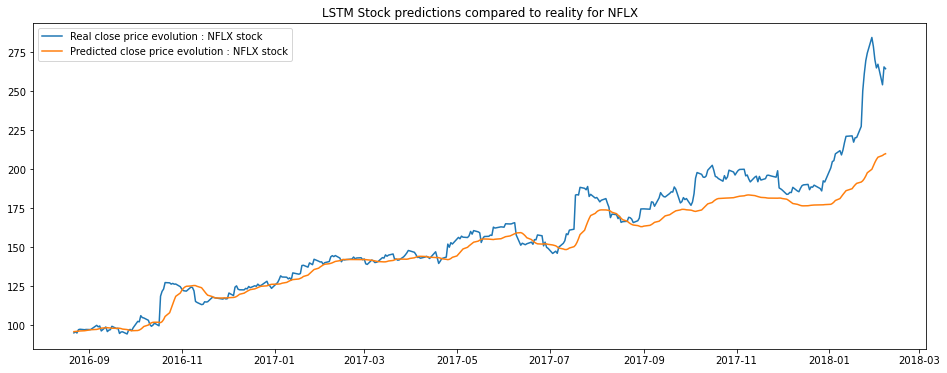

In [39]:
#Plot results
plt.figure(figsize=(16, 6))
plt.plot(dates_test, close_price_real, label='Real close price evolution : ' + selected_name + ' stock')
plt.plot(dates_test, close_price_predicted, label='Predicted close price evolution : ' + selected_name  + ' stock')
plt.legend()
plt.title("LSTM Stock predictions compared to reality for " + selected_name)
plt.show()

You can try to improve your model by adding as features the information of other actions. As you know, in stock market, most of the information that impacts it is out of the stock market information itself.